In [ ]:
!pip install numpy==1.26.4 scipy==1.13.1 gensim==4.3.3 PyMuPDF tqdm pyLDAvis

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import zipfile

# Paths on Google Drive
csv_path = '/content/drive/MyDrive/Indian_judgements/reduced_judgements_clean.csv'
pdf_zip_path = '/content/drive/MyDrive/Indian_judgements/reduced_pdfs.zip'

# Extract ZIP to a folder in Colab
extracted_pdf_dir = '/content/reduced_pdfs'
os.makedirs(extracted_pdf_dir, exist_ok=True)

with zipfile.ZipFile(pdf_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_pdf_dir)

print("PDFs extracted to:", extracted_pdf_dir)


PDFs extracted to: /content/reduced_pdfs


In [4]:
import pandas as pd

# Load CSV
df = pd.read_csv(csv_path)

# Check columns
print("Columns in CSV:", list(df.columns))

# Preview first 5 rows
print("\nFirst few rows:")
print(df.head())


Columns in CSV: ['diary_no', 'case_no', 'judgment_dates', 'pdf_exists', 'pdf_path']

First few rows:
     diary_no                          case_no judgment_dates  pdf_exists  \
0  80384-1991                              - 0     10-03-1992        True   
1  18732-1998  Crl.A. No.-001258-001263 - 1999     26-11-1999        True   
2   7011-2000    C.A. No.-002551-002551 - 2001     20-02-2008        True   
3  25859-2004    C.A. No.-000584-000584 - 2008     22-01-2008        True   
4   9232-2003    C.A. No.-004227-004227 - 2003     03-09-2009        True   

                                            pdf_path  
0  /content/indian_judgments/pdfs/80384-1991___jo...  
1  /content/indian_judgments/pdfs/18732-1998___jo...  
2  /content/indian_judgments/pdfs/7011-2000___jon...  
3  /content/indian_judgments/pdfs/25859-2004___jo...  
4  /content/indian_judgments/pdfs/9232-2003___jon...  


In [5]:
# STEP 1: Setup & Imports

!pip install PyMuPDF tqdm

import os
import fitz  # PyMuPDF
from tqdm import tqdm
import pandas as pd

# STEP 2: Paths
csv_path = '/content/drive/MyDrive/Indian_judgements/reduced_judgements_clean.csv'
pdf_dir = '/content/reduced_pdfs'  # extracted ZIP folder

# STEP 3: Load CSV
df = pd.read_csv(csv_path)
print(" CSV loaded successfully!")
print("Columns in CSV:", list(df.columns))
print("\nPreview:")
print(df.head())

df['pdf_path'] = df['pdf_path'].apply(lambda x: os.path.join(pdf_dir, os.path.basename(str(x))))

# STEP 4: Filter & Extract Text from PDFs
df['judgements_text'] = ''

# Filter to only existing & non-empty PDFs
df = df[df['pdf_path'].apply(lambda x: os.path.exists(x) and os.path.getsize(x) > 0)].reset_index(drop=True)
print("Total valid PDFs found:", len(df))

# Extract text from PDFs
for i, row in tqdm(df.iterrows(), total=len(df), desc="Extracting text"):
    pdf_path = row['pdf_path']
    text = ''
    try:
        with fitz.open(pdf_path) as doc:
            for page in doc:
                page_text = page.get_text()
                if page_text:
                    text += page_text + '\n'
    except Exception as e:
        print(f" Error reading {pdf_path}: {e}")
    df.at[i, 'judgements_text'] = text

print("\n Text extraction done for", len(df), "PDFs")

# STEP 5: Save extracted data
text_csv_path = '/content/judgements_with_text.csv'
text_parquet_path = '/content/judgements_with_text.parquet'

df.to_csv(text_csv_path, index=False)
df.to_parquet(text_parquet_path, index=False)

print(f"Saved extracted data to:\nCSV: {text_csv_path}\nParquet: {text_parquet_path}")


 CSV loaded successfully!
Columns in CSV: ['diary_no', 'case_no', 'judgment_dates', 'pdf_exists', 'pdf_path']

Preview:
     diary_no                          case_no judgment_dates  pdf_exists  \
0  80384-1991                              - 0     10-03-1992        True   
1  18732-1998  Crl.A. No.-001258-001263 - 1999     26-11-1999        True   
2   7011-2000    C.A. No.-002551-002551 - 2001     20-02-2008        True   
3  25859-2004    C.A. No.-000584-000584 - 2008     22-01-2008        True   
4   9232-2003    C.A. No.-004227-004227 - 2003     03-09-2009        True   

                                            pdf_path  
0  /content/indian_judgments/pdfs/80384-1991___jo...  
1  /content/indian_judgments/pdfs/18732-1998___jo...  
2  /content/indian_judgments/pdfs/7011-2000___jon...  
3  /content/indian_judgments/pdfs/25859-2004___jo...  
4  /content/indian_judgments/pdfs/9232-2003___jon...  
Total valid PDFs found: 1879


Extracting text: 100%|██████████| 1879/1879 [01:27<00:00, 21.41it/s]



 Text extraction done for 1879 PDFs
Saved extracted data to:
CSV: /content/judgements_with_text.csv
Parquet: /content/judgements_with_text.parquet


In [6]:
# Save extracted data directly to Google Drive
text_csv_path = '/content/drive/MyDrive/Indian_judgements/judgements_with_text.csv'
text_parquet_path = '/content/drive/MyDrive/Indian_judgements/judgements_with_text.parquet'

df.to_csv(text_csv_path, index=False)
df.to_parquet(text_parquet_path, index=False)

print(f" Saved to Google Drive:\n{text_csv_path}\n{text_parquet_path}")


 Saved to Google Drive:
/content/drive/MyDrive/Indian_judgements/judgements_with_text.csv
/content/drive/MyDrive/Indian_judgements/judgements_with_text.parquet


In [7]:
from google.colab import files
files.download('/content/judgements_with_text.csv')
files.download('/content/judgements_with_text.parquet')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# ===============================
# STEP 0: Install & Imports
# ===============================
# Install specific versions to avoid dependency conflicts


import os
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
from gensim import corpora
from gensim.models import LdaModel
import numpy as np


# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')



# ===============================
# STEP 2: Preprocessing Setup
# ===============================
stop_words = set(stopwords.words('english'))

# Add modal verbs and legal/common words
legal_stopwords = {
    # Parties & roles
    'petitioner', 'respondent', 'appellant', 'defendant', 'plaintiff', 'accused',
    'party', 'parties', 'counsel', 'advocate', 'attorney', 'prosecutor', 'applicant',

    # Court terms
    'court', 'bench', 'judgment', 'order', 'proceedings', 'hearing', 'case',
    'matter', 'petition', 'claim', 'verdict', 'decision', 'act', 'section', 'clause',

    # Legal procedures
    'filed', 'plea', 'petitioners', 'respondents', 'submitted', 'allowed',
    'dismissed', 'granted', 'rejected', 'challenged', 'reviewed', 'appeal',

    # Common legal words
    'law', 'rights', 'regulation', 'rule', 'statute', 'provision', 'authority',
    'legal', 'liable', 'responsible', 'application', 'objection', 'record',

    # Modals & connectors
    'shall', 'may', 'would', 'could', 'should', 'must', 'might'
}
stop_words.update(legal_stopwords)

lemmatizer = WordNetLemmatizer()
CHUNK_WORDS = 400
OVERLAP = 50

# ===============================
# STEP 3: Preprocessing Function
# ===============================
def preprocess_text(text):
    if not isinstance(text, str):
        return ""

    # Fix hyphens inside words (names-che -> names che)
    text = re.sub(r'(\w)-(\w)', r'\1 \2', text)

    # Remove line breaks & extra spaces
    text = re.sub(r'\n+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()

    # Remove URLs, numbers, punctuation
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize
    tokens = text.split()

    # Remove capitalized words (heuristic proper nouns)
    tokens = [w for w in tokens if not w[0].isupper()]

    # Lowercase, remove stopwords, lemmatize, remove short words
    tokens = [
        lemmatizer.lemmatize(w.lower())
        for w in tokens
        if w.lower() not in stop_words and len(w) > 2
    ]

    return ' '.join(tokens)

# Apply preprocessing
df['processed_text'] = df['judgements_text'].apply(preprocess_text)

# ===============================
# STEP 4: Chunking Function
# ===============================
def chunk_text_sliding_words(text, chunk_size=CHUNK_WORDS, overlap=OVERLAP):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return []

    words = text.split()
    if len(words) <= chunk_size:
        return [" ".join(words)]

    chunks = []
    start = 0
    while start < len(words):
        end = min(start + chunk_size, len(words))
        chunks.append(" ".join(words[start:end]))
        if end == len(words):
            break
        start += (chunk_size - overlap)
    return chunks

# Apply chunking
df['text_chunks'] = df['processed_text'].apply(chunk_text_sliding_words)

# Explode chunks into separate rows
df_chunks = df.explode('text_chunks').reset_index(drop=True)
df_chunks = df_chunks[['diary_no', 'text_chunks']]

print("\n✅ Preprocessing and chunking done!")

# ===============================
# STEP 5: Preview first 2 judgments & chunks
# ===============================
first_two_diary_nos = df_chunks['diary_no'].unique()[:2]

for diary_no in first_two_diary_nos:
    print(f"\n=== Chunks for Judgment {diary_no} ===\n")

    chunks = df_chunks[df_chunks['diary_no'] == diary_no]['text_chunks'].tolist()

    for i, chunk in enumerate(chunks, 1):
        print(f"--- Chunk {i} ({len(chunk.split())} words) ---")
        print(chunk[:500] + ("..." if len(chunk) > 500 else ""))
        print()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



✅ Preprocessing and chunking done!

=== Chunks for Judgment 80384-1991 ===

--- Chunk 1 (400 words) ---
qualification exercise jurisdiction ground incumbent fulfill qualification required dated appointed procedure officer administer justice power analogous judicial hold judicial office judiciary justice assume jurisdiction judicial side probe purely administrative nature exclusively within purview serviceinterpretation letter dated addressed recommended name appointment bio data enclosed said letter indicated passing joined worked various post appointed worked also worked certain bio data describe...

--- Chunk 2 (400 words) ---
eligible appointed scheme clear independence judiciary part basic structure achieve objective separation judiciary executive framer meant judicial office exist independently duty part duty conferred person whether trained administration justice enshrined give mandate take step separate judiciary executive mean separate judicial service free executive control p

In [9]:
# Run this cell first
!pip install -q transformers sentence-transformers accelerate datasets torch --upgrade
# small progress bar lib
!pip install -q tqdm

# Confirm GPU
import torch
print("torch version:", torch.__version__)
print("cuda available:", torch.cuda.is_available())


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.3/506.3 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 23.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 25.6.0 requires pyarrow<20.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 21.0.0 which is incompatible.
pylibcudf-cu12 25.6.0 requires pyarrow<20.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 21.0.0 which is incompatible.
torch version: 2.8.0+cu126
cuda available: False


In [10]:
# If you still have df & df_chunks in memory you can skip reloading.
# This reloads the extracted data saved earlier to be safe.
import os
import pandas as pd

# Paths (your earlier saves)
drive_csv = '/content/drive/MyDrive/Indian_judgements/judgements_with_text.csv'
local_csv = '/content/judgements_with_text.csv'

if os.path.exists(drive_csv):
    df = pd.read_csv(drive_csv)
    print("Loaded from Drive:", drive_csv)
elif os.path.exists(local_csv):
    df = pd.read_csv(local_csv)
    print("Loaded from local:", local_csv)
else:
    raise FileNotFoundError("judgements_with_text.csv not found. Please run your text extraction cell first or place the CSV at the given path.")

# If df_chunks isn't present in memory, rebuild quickly from df (uses your processed_text and chunk function)
if 'df_chunks' not in globals():
    print("Rebuilding df_chunks from df (using processed_text -> sliding chunks)...")
    # make sure preprocess & chunk functions exist; redefine minimal versions to match your earlier ones
    import re
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    # reuse your chunking function pattern if present in session; otherwise we create a safe version:
    CHUNK_WORDS = 400
    OVERLAP = 50
    def chunk_text_sliding_words(text, chunk_size=CHUNK_WORDS, overlap=OVERLAP):
        if not isinstance(text, str) or len(text.strip()) == 0:
            return []
        words = text.split()
        if len(words) <= chunk_size:
            return [" ".join(words)]
        chunks = []
        start = 0
        while start < len(words):
            end = min(start + chunk_size, len(words))
            chunks.append(" ".join(words[start:end]))
            if end == len(words):
                break
            start += (chunk_size - overlap)
        return chunks

    df['processed_text'] = df.get('processed_text', df.get('judgements_text', '').fillna(''))
    df['text_chunks'] = df['processed_text'].apply(chunk_text_sliding_words)
    df_chunks = df[['diary_no', 'case_no', 'pdf_path', 'text_chunks']].explode('text_chunks').reset_index(drop=True)
else:
    print("Using existing df_chunks in memory")

print("Total documents (unique diary_no):", df['diary_no'].nunique())
print("Total chunks:", len(df_chunks))


Loaded from Drive: /content/drive/MyDrive/Indian_judgements/judgements_with_text.csv
Using existing df_chunks in memory
Total documents (unique diary_no): 1824
Total chunks: 8318


In [13]:
# Config
LABELS = [
    'Constitutional Law',
    'Administrative/Service Law',
    'Tax/Corporate Law',
    'Civil & Property Law',
    'Criminal Law',
    'Labour/Employment Law'
]

MAX_CHUNKS_PER_DOC = 4
BATCH_SIZE = 16
NLI_MODEL = "typeform/distilbert-base-uncased-mnli"

from transformers import pipeline
import torch

device = 0 if torch.cuda.is_available() else -1
print("Using device:", "cuda" if device==0 else "cpu")
zero_shot = pipeline("zero-shot-classification", model=NLI_MODEL, device=device)

# Build a doc->chunks mapping (limit chunks per doc)
grouped = df_chunks.groupby('diary_no')['text_chunks'].apply(list).to_dict()
docs = list(grouped.keys())[:100]
print("Documents to classify:", len(docs))

# Helper to split list into batches
def chunks_list(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i+n]

import numpy as np
from tqdm import tqdm

results = []  # will hold tuples (diary_no, label_scores_dict)

for diary_no in tqdm(docs, desc="Classifying docs"):
    chunks = grouped.get(diary_no, [])[:MAX_CHUNKS_PER_DOC]
    if not chunks:
        avg_scores = {lbl: 0.0 for lbl in LABELS}
        results.append((diary_no, avg_scores))
        continue

    all_scores = []
    for batch in chunks_list(chunks, BATCH_SIZE):
        out = zero_shot(batch, LABELS, multi_label=False)
        if isinstance(out, dict):  # normalize single result
            out = [out]
        for o in out:
            d = {label: 0.0 for label in LABELS}
            for l, s in zip(o['labels'], o['scores']):
                d[l] = s
            all_scores.append(d)

    avg_scores = {label: np.mean([d[label] for d in all_scores]) for label in LABELS}
    results.append((diary_no, avg_scores))

# Build dataframe of predictions
pred_rows = []
for diary_no, score_dict in results:
    best_label = max(score_dict.items(), key=lambda x: x[1])[0]
    pred_rows.append({
        'diary_no': diary_no,
        'predicted_category': best_label,
        **{f"score_{lbl}": float(score_dict[lbl]) for lbl in LABELS}
    })

pred_df = pd.DataFrame(pred_rows)
print("Predictions done for", len(pred_df), "documents")

# 🔹 Merge predictions back with original dataframe to include case_no and temp_link
if "case_no" in df.columns and "temp_link" in df.columns:
    final_df = df.merge(pred_df, on="diary_no", how="inner")
    out_cols = ["diary_no", "case_no", "predicted_category", "temp_link"]
else:
    final_df = pred_df
    out_cols = ["diary_no", "predicted_category"]

# 🔹 Save predictions to Google Drive
out_path = "/content/drive/MyDrive/Indian_judgements/bert_output_predictions.csv"
os.makedirs(os.path.dirname(out_path), exist_ok=True)
final_df[out_cols].to_csv(out_path, index=False)

print("✅ Saved BERT predictions to:", out_path)
final_df[out_cols].head()


Using device: cpu


Device set to use cpu


Documents to classify: 100


Classifying docs: 100%|██████████| 100/100 [26:12<00:00, 15.72s/it]

Predictions done for 100 documents
✅ Saved BERT predictions to: /content/drive/MyDrive/Indian_judgements/bert_output_predictions.csv


,diary_no,predicted_category
0,-0,Labour/Employment Law
1,-1428,Labour/Employment Law
2,1-1148,Civil & Property Law
3,1-1918,Labour/Employment Law
4,1-9098,Civil & Property Law


In [15]:
import numpy as np

# Average confidence of predicted labels
final_df['max_score'] = final_df[[f"score_{lbl}" for lbl in LABELS]].max(axis=1)
avg_confidence = final_df['max_score'].mean()
print("Average confidence of predictions:", avg_confidence)

# Distribution of predicted categories
category_counts = final_df['predicted_category'].value_counts()
print("\nPredicted category distribution:\n", category_counts)


Average confidence of predictions: 0.19774087080111105

Predicted category distribution:
 predicted_category
Civil & Property Law          35
Labour/Employment Law         28
Criminal Law                  13
Tax/Corporate Law             12
Administrative/Service Law    11
Constitutional Law             1
Name: count, dtype: int64


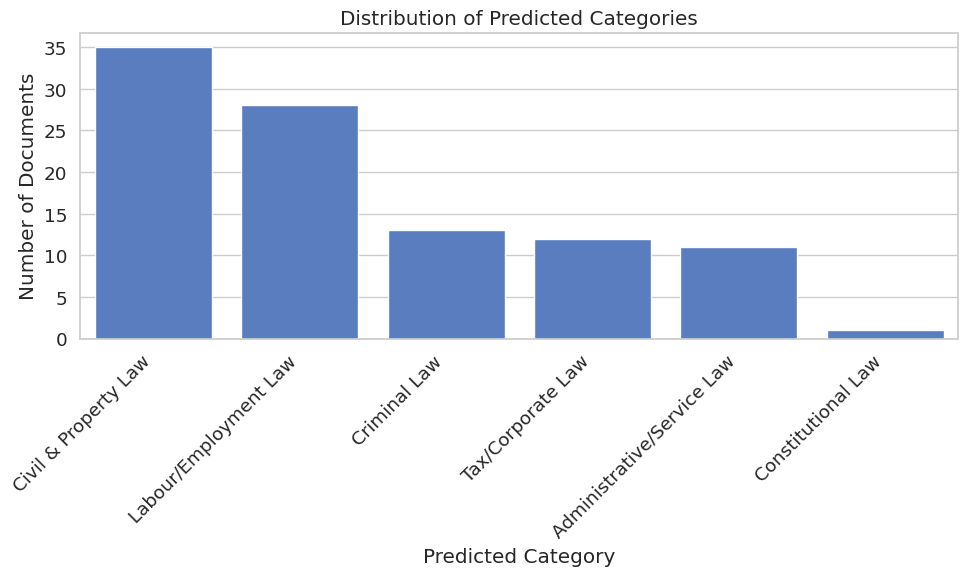

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use Seaborn styling
sns.set(style="whitegrid", palette="muted", font_scale=1.2)


# 1️ Distribution of predicted categories

plt.figure(figsize=(10,6))
sns.countplot(data=final_df, x='predicted_category', order=final_df['predicted_category'].value_counts().index)
plt.title("Distribution of Predicted Categories")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Documents")
plt.xlabel("Predicted Category")
plt.tight_layout()
plt.show()




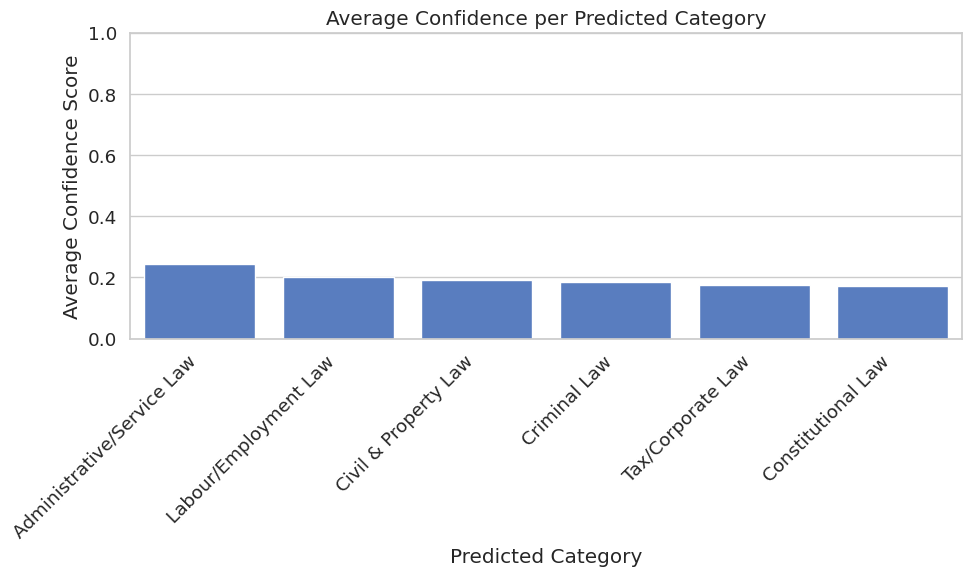

In [18]:

# 2️ Average confidence per category

if 'max_score' not in final_df.columns:
    final_df['max_score'] = final_df[[f"score_{lbl}" for lbl in LABELS]].max(axis=1)

avg_conf = final_df.groupby('predicted_category')['max_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_conf.index, y=avg_conf.values)
plt.title("Average Confidence per Predicted Category")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Confidence Score")
plt.xlabel("Predicted Category")
plt.ylim(0,1)
plt.tight_layout()
plt.show()

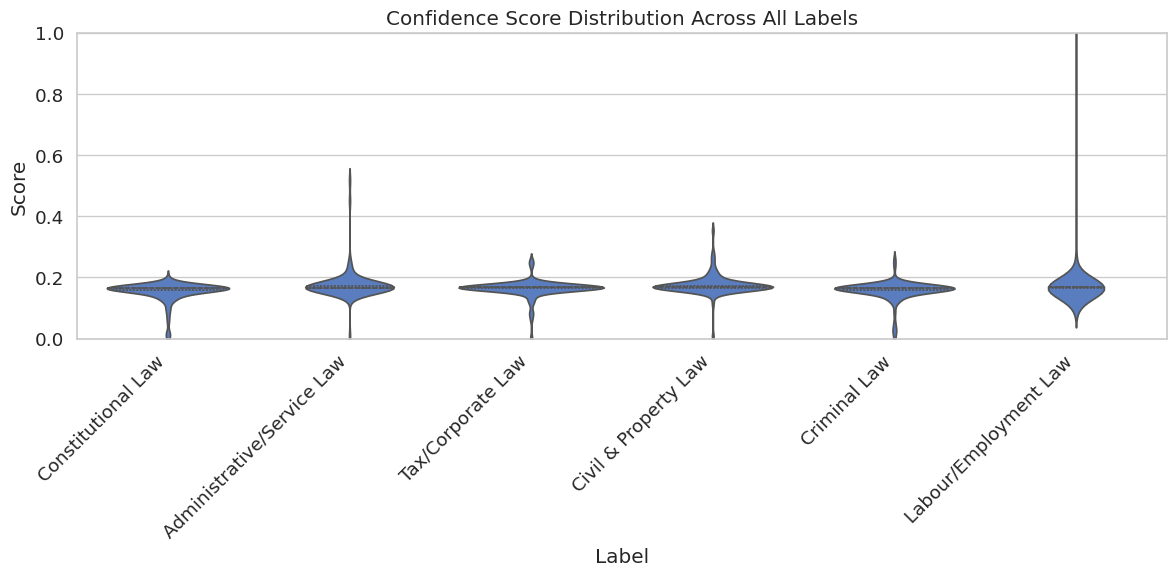

In [19]:
# 3️ Confidence distribution per category (violin plot)
plt.figure(figsize=(12,6))
score_cols = [f"score_{lbl}" for lbl in LABELS]
df_melted = final_df.melt(id_vars=['diary_no','predicted_category'], value_vars=score_cols,
                          var_name='label', value_name='score')
df_melted['label'] = df_melted['label'].str.replace('score_','')

sns.violinplot(data=df_melted, x='label', y='score', inner='quartile')
plt.title("Confidence Score Distribution Across All Labels")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Score")
plt.xlabel("Label")
plt.ylim(0,1)
plt.tight_layout()
plt.show()


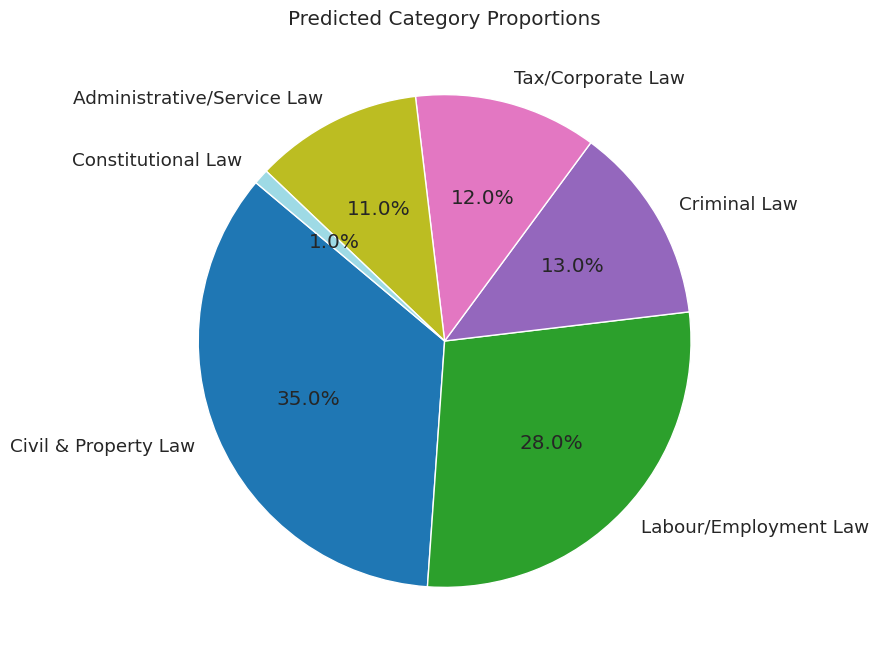

In [20]:
# 4️ Pie chart of category proportions
plt.figure(figsize=(8,8))
final_df['predicted_category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, cmap='tab20')
plt.title("Predicted Category Proportions")
plt.ylabel('')
plt.show()
